In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing the data using pandas
df=pd.read_csv('/content/drive/MyDrive/bollywood.csv')
print(df.columns)

Index(['SlNo', 'Release Date', 'MovieName', 'ReleaseTime', 'Genre', 'Budget',
       'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes',
       'YoutubeDislikes'],
      dtype='object')


# 1.How many records are present in the dataset?print the metadata information of the dataset.

In [4]:
print(len(df))

149


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    int64  
 1   Release Date         149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB


# 2.How many movies got released in each Genre?which Genre had highest number of releases?Sort number of releases in each Genre in descending order.

In [80]:
#Avoiding inconsistency in the data
df['Genre'].replace({'Thriller ':'Thriller','Action ':'Action'},inplace=True)

In [7]:
df.groupby('Genre')['SlNo'].count()

Genre
 Drama      35
Action      24
Comedy      36
Romance     25
Thriller    29
Name: SlNo, dtype: int64

In [8]:
print(df['Genre'].value_counts())
print((df['Genre'].value_counts().index)[0])

Comedy      36
 Drama      35
Thriller    29
Romance     25
Action      24
Name: Genre, dtype: int64
Comedy


# 3.How many movies in each genre got released in different release times like long weekend,festive season,etc?

In [9]:
print(df['ReleaseTime'].unique())
print(pd.crosstab(df['Genre'],df['ReleaseTime']))

['LW' 'N' 'HS' 'FS']
ReleaseTime  FS  HS  LW   N
Genre                      
 Drama        4   6   1  24
Action        3   3   3  15
Comedy        3   5   5  23
Romance       3   3   4  15
Thriller      4   1   2  22


# 4.Which month of the year,maximum number of movies releases are seen?

In [10]:
#extracting the month from the column Release Date using spilt() and stored in col 'mon'
print(df['Release Date'])
df['mon']=0
for i in df.index:
  df['mon'][i]=df['Release Date'][i].split('-')[1]
print(df['mon'])

0      18-Apr-14
1       4-Jan-13
2      18-Jul-14
3       4-Jan-13
4       4-Jul-14
         ...    
144    27-Feb-15
145    13-Mar-15
146    20-Mar-15
147    20-Mar-15
148    23-May-14
Name: Release Date, Length: 149, dtype: object
0      Apr
1      Jan
2      Jul
3      Jan
4      Jul
      ... 
144    Feb
145    Mar
146    Mar
147    Mar
148    May
Name: mon, Length: 149, dtype: object


<ipython-input-10-e5e163d998f7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mon'][i]=df['Release Date'][i].split('-')[1]


In [81]:
print("the maximum releases are seen in the month",(df['mon'].value_counts().index)[0])

the maximum releases are seen in the month Jan


# 5.which month of the year typically sees most releases of high budgeted movies,that is,movies with budget of 25 crores or more?

In [12]:
#filtering the movies with budget>=25 crores and picked the first index value
df1=df[df['Budget']>=25]
(df1['mon'].value_counts().index)[0]

'Feb'

# 6.which are the top 10 movies with max return on investment(ROI)?calculate ROI as (Boxofficecollection-Budget)/Budget

In [13]:
df['roi']=(df['BoxOfficeCollection']-df['Budget'])/df['Budget']
df.sort_values('roi', axis = 0, ascending = False,inplace = True)
print(df['MovieName'][0:10])

64                    Aashiqui 2
89                            PK
132                  Grand Masti
135                 The Lunchbox
87                        Fukrey
58                      Mary Kom
128                       Shahid
37     Humpty Sharma Ki Dulhania
101           Bhaag Milkha Bhaag
115              Chennai Express
Name: MovieName, dtype: object


# 7.Do the movies have higher ROI if they get released on Festive Seasons or Long Weekend?Calculate the average ROI for different times?

In [83]:
print(pd.Series.sort_values(df.groupby('ReleaseTime')['roi'].mean(),ascending=False))
print('yes the movies released on Festive Seasons and Long Weekend have higher ROI')

ReleaseTime
LW    1.127205
FS    0.973853
HS    0.850867
N     0.657722
Name: roi, dtype: float64
yes the movies released on Festive Seasons and Long Weekend have higher ROI


# Find out the distribution of movie budgets.Interpret the plot to conclude if the most movies are high or low budgeted movies?

Axes(0.125,0.11;0.775x0.77)
In conclusion most of the movies are not high budgeted movies.Since our data is right skewed.


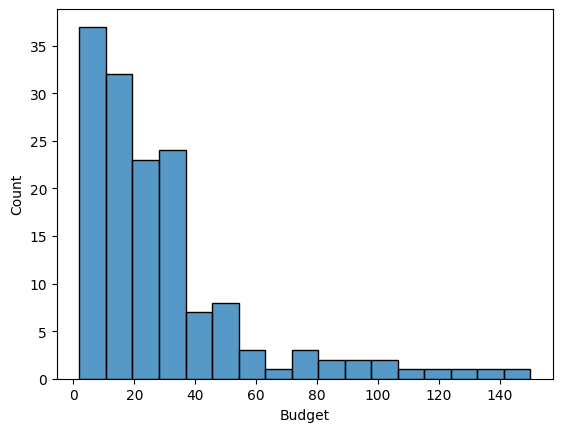

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
print(sns.histplot(df['Budget']))
print("In conclusion most of the movies are not high budgeted movies.Since our data is right skewed.")

# 9.Compare the distribution of ROIs between movies with Comedy genre and Drama.Which genre typically sees higher ROIs?

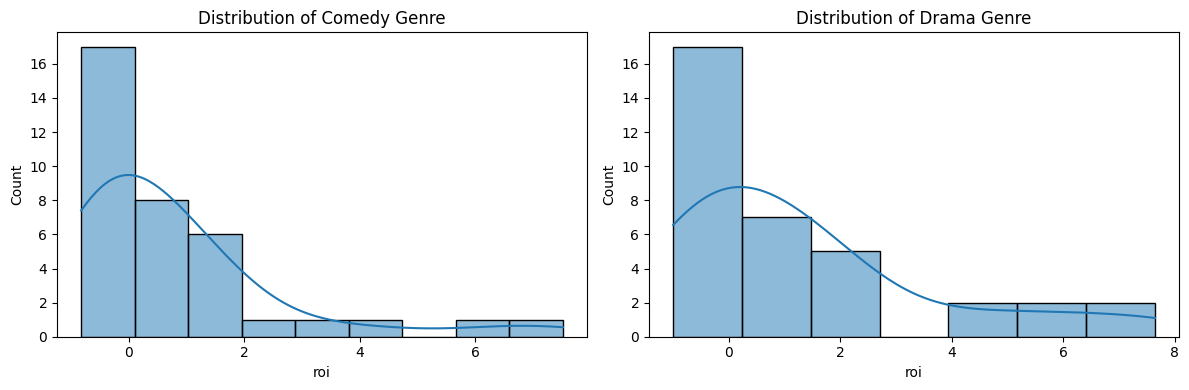

In [85]:
# Filter the data for Comedy genre
comedy = df[df['Genre'] == 'Comedy']

# Filter the data for Drama genre
drama = df[df['Genre'] == ' Drama ']

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Create a kernel density plot for Comedy genre on the first subplot
sns.histplot(data=comedy, x="roi", kde=True, ax=axes[0])
axes[0].set_title('Distribution of Comedy Genre')

# Create a kernel density plot for Drama genre on the second subplot
sns.histplot(data=drama, x="roi", kde=True, ax=axes[1])
axes[1].set_title('Distribution of Drama Genre')

# Adjust spacing between subplots
plt.tight_layout()

# Show the side-by-side plots
plt.show()


# 10.Is there a correlation between Box Office Collection and You Tube Likes?Is the correlation positive or negative?

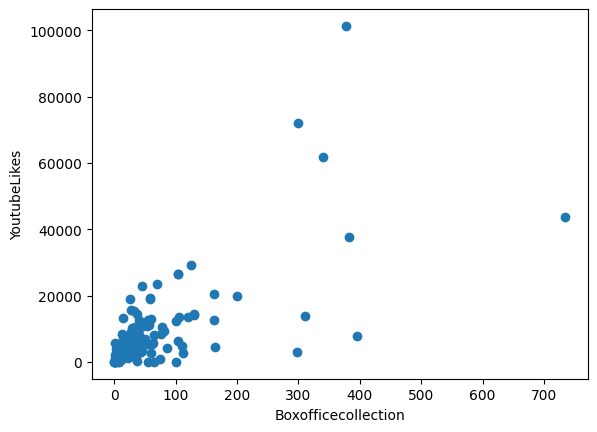

the correlation between boxoffice collection and youtubelikes is 0.6825165877731302


<ipython-input-65-14283d162c4c>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('the correlation between boxoffice collection and youtubelikes is',(df.corr())['YoutubeLikes']['BoxOfficeCollection'])


In [65]:
plt.scatter(df['BoxOfficeCollection'],df['YoutubeLikes'])
plt.xlabel('Boxofficecollection')
plt.ylabel('YoutubeLikes')
plt.show()
print('the correlation between boxoffice collection and youtubelikes is',(df.corr())['YoutubeLikes']['BoxOfficeCollection'])

# 11.Which genre of movies typically sees more You Tube Likes?Draw boxplots for each genre of movies to compare.

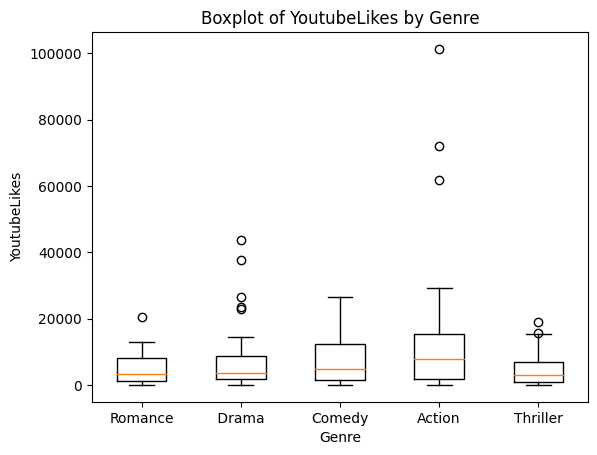

On interpretation of the above graph we can see the Action genre has more You Tube Likes.


In [90]:
plt.boxplot([df[df['Genre'] == 'Comedy']['YoutubeLikes'], df[df['Genre'] == ' Drama ']['YoutubeLikes'],df[df['Genre'] == 'Romance']['YoutubeLikes'],df[df['Genre'] == 'Action']['YoutubeLikes'],df[df['Genre'] == 'Thriller']['YoutubeLikes']], labels=['Romance',' Drama ','Comedy','Action','Thriller'])
plt.title('Boxplot of YoutubeLikes by Genre')
plt.xlabel('Genre')
plt.ylabel('YoutubeLikes')
plt.show()
print('On interpretation of the above graph we can see the Action genre has more You Tube Likes.')

# 12.Which of the variables among Budget,BoxOfficeCollection,YouTubeView,YouTubeLikes,YouTubeDislikes are highly correlated?

<Axes: >

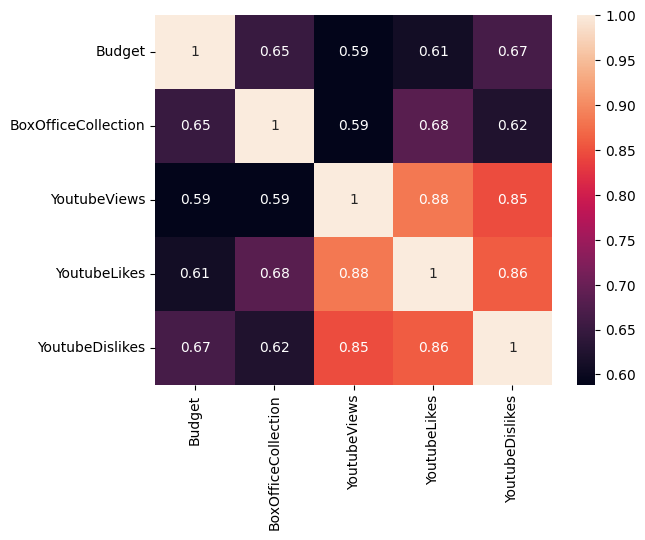

In [79]:
var=['Budget','BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes','YoutubeDislikes']
sns.heatmap(df[var].corr(),annot=True)